In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

In [2]:
PATH = "../../data/"
data_full = pd.read_csv(f'{PATH}train.tsv', sep='\t')
data_full.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
len(data_full)

1482535

In [4]:
data_full.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

# Categories

### Replace NaN in category_name by 'No Category'

In [5]:
print(data_full.category_name.isnull().sum(), 'items have no category')

6327 items have no category


In [6]:
category_name_replaced = data_full.category_name.fillna('No Category')

In [7]:
category_name_replaced.isnull().sum()

0

### Analysis

In [8]:
print("There is {} unique categories".format(category_name_replaced.nunique()))

There is 1288 unique categories


In [9]:
cat_counts = {} # dict to store number of items posted in each category
for cat in tqdm_notebook(category_name_replaced.unique()):
    cat_counts[cat] = (category_name_replaced == cat).sum()

In [10]:
cat_counts_df = pd.DataFrame(data={'category_name': list(cat_counts.keys()), 'count': list(cat_counts.values())})

In [11]:
cat_counts_df.head()

,category_name,count
0,Men/Tops/T-shirts,15108
1,Electronics/Computers & Tablets/Components & P...,964
2,Women/Tops & Blouses/Blouse,20284
3,Home/Home Décor/Home Décor Accents,13004
4,Women/Jewelry/Necklaces,19758


In [12]:
cat_counts_df.describe()

,count
count,1288.000000
mean,1151.036491
std,3761.740192
min,1.000000
25%,10.000000
50%,76.000000
75%,590.000000
max,60177.000000


In [13]:
cat_counts_sorted = cat_counts_df.sort_values(by='count')

In [14]:
cat_counts_sorted.to_csv('cat_counts_sorted.csv')

In [15]:
print(len(cat_counts_df.loc[cat_counts_df['count'] == 1]), 'categories contain only a single item.')

84 categories contain only a single item.


In [16]:
from collections import OrderedDict

cat_counts_sorted = OrderedDict(sorted(cat_counts.items(), key=lambda t: t[1]))

### Conlusions

1288 unique categories, 6327 items have no category, 84 categories contain only a single item

# Analyse 'Electronics/Video Games & Consoles/Video Gaming Merchandise' category

In [17]:
import sys
sys.path.append("../../lib") # Adds higher directory to python modules path.
import helper_functions as hf

In [18]:
data_full_replaced = hf.replace_nan(data_full)

In [19]:
cat_df = data_full_replaced.loc[data_full_replaced.category_name == 'Electronics/Video Games & Consoles/Video Gaming Merchandise']

In [20]:
len(cat_df)

1151

In [21]:
cat_df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
140,140,Zelda Link Amiibo.,1,Electronics/Video Games & Consoles/Video Gamin...,Nintendo,40.0,1,New
1239,1239,Thumbsticks grips 1 pair,2,Electronics/Video Games & Consoles/Video Gamin...,No Brand,3.0,1,"Can fit ps2,PS3,ps4,xbox360,XboxOne"
2706,2706,Zelda amiibo Toon Link (Smash bros),1,Electronics/Video Games & Consoles/Video Gamin...,Nintendo,29.0,0,"New / Unopened. This is a Japanese version, bu..."
4414,4414,These are my favorite Amiibos and will o,4,Electronics/Video Games & Consoles/Video Gamin...,Nintendo,46.0,0,These are my favorite Amiibos and will only se...
4482,4482,Space Invaders Figurine,2,Electronics/Video Games & Consoles/Video Gamin...,No Brand,7.0,0,Loot Crate EXCLUSIVE Space Invaders Orange Vin...


In [22]:
(cat_df.brand_name == 'No Brand').sum()

406

In [23]:
print("{} items has no description.".format((cat_df.item_description == 'No description yet').sum()))

86 items has no description.


In [24]:
cat_df_cleaned = cat_df[cat_df.item_description != 'No description yet']

In [25]:
len(cat_df_cleaned)

1065

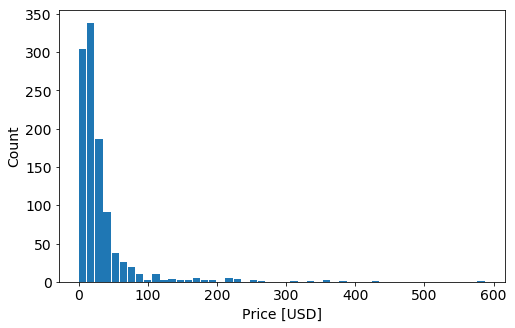

In [39]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 5))
plt.hist(cat_df_cleaned.price, bins=50, rwidth=0.9)
# plt.title('Histogram of price', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Price [USD]')
plt.savefig('histogram_price.png', dpi=200)
plt.show()

# Item description

### Conlusions

In [27]:
(data_full.item_description == 'No description yet').sum()

82489

Although only 4 items have NaN in the description, 82,489 items have text saying 'No description yet'